In [33]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [34]:
app = pd.read_csv('ApplianceShipments.csv')

In [35]:
app.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [36]:
len(app)

20

In [37]:
date = app.Quarter.str.replace(r'(Q\d)-(\d+)', r'\2-\1')
app['Date'] = pd.to_datetime(date).dt.strftime('%Q-%y')

In [38]:
app['Date']

0     1985-01-01 00:00:00
1     1985-04-01 00:00:00
2     1985-07-01 00:00:00
3     1985-10-01 00:00:00
4     1986-01-01 00:00:00
5     1986-04-01 00:00:00
6     1986-07-01 00:00:00
7     1986-10-01 00:00:00
8     1987-01-01 00:00:00
9     1987-04-01 00:00:00
10    1987-07-01 00:00:00
11    1987-10-01 00:00:00
12    1988-01-01 00:00:00
13    1988-04-01 00:00:00
14    1988-07-01 00:00:00
15    1988-10-01 00:00:00
16    1989-01-01 00:00:00
17    1989-04-01 00:00:00
18    1989-07-01 00:00:00
19    1989-10-01 00:00:00
Name: Date, dtype: object

In [39]:
Shipments_ts = pd.Series(app.Shipments.values, index = app['Date'], name = 'Shipments')
Shipments_ts.index = pd.DatetimeIndex(Shipments_ts.index)

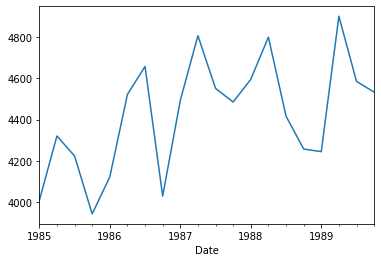

In [40]:
Shipments_ts.plot()

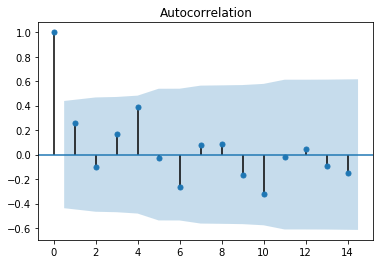

[ 1.          0.26083184 -0.09758524  0.16445801  0.38652455 -0.03042605
 -0.26866791  0.0814743   0.0857652  -0.16803869 -0.32497443 -0.01872269
  0.04702233 -0.09635929 -0.14684003 -0.08198625 -0.0411411  -0.16529973
 -0.05452651 -0.03150832]


C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [41]:
tsaplots.plot_acf(Shipments_ts)
plt.show()
print(stattools.acf(Shipments_ts))

The lag with the highest coefficient is lag 4